<a href="https://colab.research.google.com/github/XLDiaz/Twitter_Sentiment_Analysis-/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introducción a Social Media Sentiment Analysis 

![sen](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/performing-twitter-sentiment-analysis1.jpg)

PLANTEAMIENTO DEL PROBLEMA


> Conjunto de datos que contiene varios tweets con sentimientos positivos y negativos asociados

> El acoso cibernético y el discurso de odio han sido una amenaza durante bastante tiempo, por lo que nuestro objetivo para esta tarea es detectar tweets de discursos asociados con sentimientos negativos. A partir de este conjunto de datos, clasificamos un tweet como discurso de odio si tiene tweets racistas o sexistas asociados. con eso.

> Entonces, nuestra tarea aquí es clasificar los tweets racistas y sexistas de otros tweets y filtrarlos.




DESCRIPCIÓN DEL CONJUNTO DE DATOS

> Los datos están en formato csv. En informática, un archivo de valores separados por comas (CSV) almacena datos tabulares (números y texto) en texto sin formato. Cada línea del archivo es un registro de datos. Cada registro consta de uno o más campos, separados por comas.

> Formalmente, dada una muestra de entrenamiento de tweets y etiquetas, donde la etiqueta '1' indica que el tweet es racista/sexista y la etiqueta '0' indica que el tweet no es racista/sexista, nuestro objetivo es predecir las etiquetas en el conjunto de datos de prueba dado. .

INFORMACIÓN DE ATRIBUTOS

> id: la identificación asociada con los tweets en el conjunto de datos dado

> tweets: los tweets recopilados de varias fuentes y que tienen sentimientos positivos o negativos asociados con ellos

> etiqueta: un tweet con la etiqueta '0' tiene un sentimiento positivo, mientras que un tweet con la etiqueta '1' tiene un sentimiento negativo

IMPORTANDO LOS PAQUETES NECESARIOS

In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

CONJUNTO DE DATOS UTILIZADO EN EL ANÁLISIS

In [6]:
train = pd.read_csv('/content/drive/MyDrive/XLDiaz/Twitter_Sentiment_Analysis/train.csv', index_col = 'id')
test = pd.read_csv('/content/drive/MyDrive/XLDiaz/Twitter_Sentiment_Analysis/test.csv', index_col = 'id')

In [7]:
# total de 31692 tweets en el conjunto de datos de entrenamiento.
train.shape

(31962, 2)

In [8]:
train

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
...,...,...
31958,0,ate @user isz that youuu?ðððððð...
31959,0,to see nina turner on the airwaves trying to...
31960,0,listening to sad songs on a monday morning otw...


In [12]:
# total de 17197 tweets en el conjunto de datos de prueba
test.shape

(17197, 1)

In [13]:
test

,tweet
id,
31963,#studiolife #aislife #requires #passion #dedic...
31964,@user #white #supremacists want everyone to s...
31965,safe ways to heal your #acne!! #altwaystohe...
31966,is the hp and the cursed child book up for res...
31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...
49155,thought factory: left-right polarisation! #tru...
49156,feeling like a mermaid ð #hairflip #neverre...
49157,#hillary #campaigned today in #ohio((omg)) &am...


# PREPROCESAMIENTO DE LOS DATOS:



In [14]:
# Combinamos los conjuntos de datos de entrenamiento y prueba para la etapa de preprocesamiento
combine = train.append(test,ignore_index=True,sort=True)

In [15]:
combine.head()

,label,tweet
0,0.0,@user when a father is dysfunctional and is s...
1,0.0,@user @user thanks for #lyft credit i can't us...
2,0.0,bihday your majesty
3,0.0,#model i love u take with u all the time in ...
4,0.0,factsguide: society now #motivation


In [16]:
combine.tail()

,label,tweet
49154,NaN,thought factory: left-right polarisation! #tru...
49155,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,NaN,"happy, at work conference: right mindset leads..."
49158,NaN,"my song ""so glad"" free download! #shoegaze ..."


ELIMINAR IDENTIFICADORES DE TWITTER (@USER):

> A continuación se muestra una función definida por el usuario para eliminar patrones de texto no deseados de los tweets. Se necesitan dos argumentos, uno es la cadena original de texto y el otro es el patrón de texto que queremos eliminar de la cadena. La función devuelve la misma cadena de entrada pero sin el patrón dado. Usaremos esta función para eliminar el patrón "@user" de todos los tweets en nuestros datos.

In [17]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
        

In [18]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

combine.head()

,label,tweet,Tidy_Tweets
0,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0.0,factsguide: society now #motivation,factsguide: society now #motivation


REMOVER SIGNOS DE PUNTUACIÓN, NÚMEROS Y CARACTERES ESPECIALES:



> Los signos de puntuación, los números y los caracteres especiales no ayudan mucho. Es mejor eliminarlos del texto tal como eliminamos los identificadores de Twitter. Aquí reemplazaremos todo excepto los caracteres y hashtags con espacios.



In [20]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,label,tweet,Tidy_Tweets
0,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [21]:
combine.head(10)

,label,tweet,Tidy_Tweets
0,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


REMOVER PALABRAS CORTAS:


> Aquí debemos tener un poco de cuidado al seleccionar la longitud de las palabras que queremos eliminar. Por lo tanto, he decidido eliminar todas las palabras que tengan una longitud de 3 o menos. Por ejemplo, términos como “hmm”, “oh” son de muy poca utilidad. Es mejor deshacerse de ellos.



In [22]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,label,tweet,Tidy_Tweets
0,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in ...,#model love take with time
4,0.0,factsguide: society now #motivation,factsguide society #motivation
5,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


TOKENIZACIÓN:



> Ahora tokenizaremos todos los tweets limpios en nuestro conjunto de datos. Los tokens son términos o palabras individuales, y la tokenización es el proceso de dividir una cadena de texto en tokens.



In [23]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

STEMMING:





> Stemming es un proceso basado en reglas para eliminar los sufijos ("ing", "ly", "es", "s", etc.) de una palabra. **Por ejemplo:**  “play”, “player”, “played”, “plays” y “playing” son las diferentes variaciones de la palabra: "PLAY"





In [24]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [25]:
# Ahora volvamos a unir los Tokens
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,label,tweet,Tidy_Tweets
0,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,0.0,bihday your majesty,bihday your majesti
3,0.0,#model i love u take with u all the time in ...,#model love take with time
4,0.0,factsguide: society now #motivation,factsguid societi #motiv


# WORDCLOUD


> Una nube de palabras (WordCloud) es una visualización en la que las palabras más frecuentes aparecen en tamaño grande y las palabras menos frecuentes aparecen en tamaños más pequeños.




In [26]:
# Importar paquetes necesarios para generar WordCloud

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

WORDCLOUD DE LAS PALABRAS NO RACISTAS/SEXISTAS MAS USADAS

In [27]:
# Almacenar todas las palabras del conjunto de datos que no sean racistas/sexistas
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

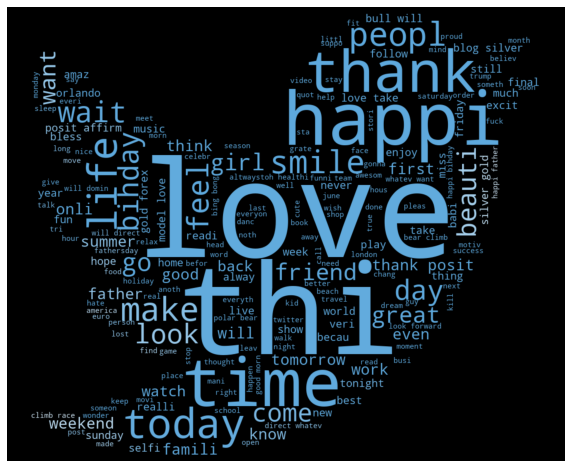

In [30]:
# Combinar la imagen del logo de Twitter con las palabras
Mask = np.array(Image.open('/content/drive/MyDrive/XLDiaz/Twitter_Sentiment_Analysis/Twitter-PNG-Image.png'))

# Usamos la librería ImageColorGenerator de Wordcloud 
# Acá imponemos el color de la imagen y se lo imponemos al wordcloud
image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)
plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

WORDCLOUD DE LAS PALABRAS RACISTAS/SEXISTAS MAS USADAS

In [31]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

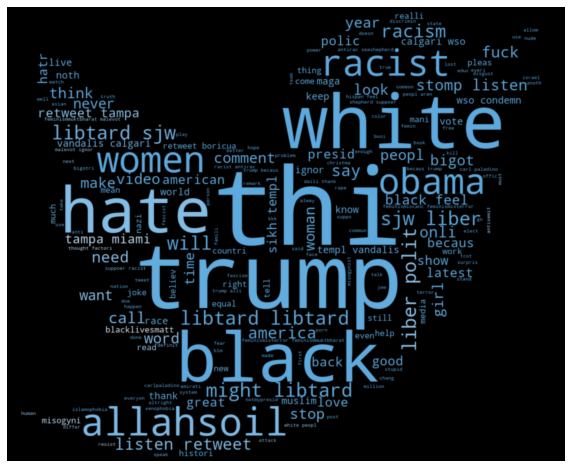

In [32]:

Mask = np.array(Image.open('/content/drive/MyDrive/XLDiaz/Twitter_Sentiment_Analysis/Twitter-PNG-Image.png'))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)
plt.figure(figsize=(10,20))

plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

# HASHTAGS


In [33]:
# Función para extraer hashtags

def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [34]:
# Una lista anidada de todos los hashtags de las críticas positivas del conjunto de datos
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

ht_positive_unnest = sum(ht_positive,[])

# Una lista anidada de todos los hashtags de las críticas negativas del conjunto de datos
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])

ht_negative_unnest = sum(ht_negative,[])

HASHTAGS POSITIVOS

In [35]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [43]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


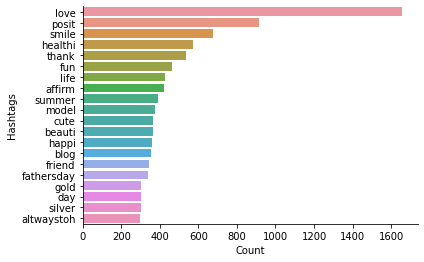

In [41]:
# 10 palabras más frecuentes utilizadas en los hashtags
df_positive_plot = df_positive.nlargest(20,columns='Count') 
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

HASHTAGS NEGATIVOS

In [44]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [45]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


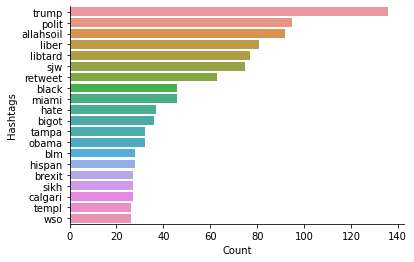

In [46]:
# 10 palabras más frecuentes utilizadas en los hashtags
df_negative_plot = df_negative.nlargest(20,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

# EXTRACCIÓN DE CARACTERÍSTICAS DE LOS TWEETS

BAG-OF-WORDS
---
Bag of Words es un método para extraer características de documentos de texto. Estas características se pueden usar para entrenar algoritmos de aprendizaje automático. Crea un vocabulario de todas las palabras únicas que aparecen en todos los documentos del conjunto de entrenamiento.

Considere una colección de textos llamada C, de D documentos {d1,d2…..dD} y N tokens únicos extraídos del corpus C. Los N tokens (palabras) formarán una lista, y el tamaño de La matriz M de bolsa de palabras estará dada por D X N. Cada fila en la matriz M contiene la frecuencia de los tokens en el documento D(i).

Por ejemplo, si se tienen 2 documentos-



- d1: Es un chico vago. Ella también es perezosa.

- d2: Smith es una persona perezosa.

Primero, se crea un vocabulario usando palabras únicas de todos los documentos.

['Él', 'Ella', 'perezoso', 'niño', 'Smith', 'persona']

- Aquí, D=2, N=6

Se forma entonces la matriz M de tamaño 2 X 6 que muestra las funciones de capacitación que contienen frecuencias de términos de cada palabra en cada documento. Esto se denomina enfoque de bolsa de palabras, ya que en este enfoque es importante el número de ocurrencias y no la secuencia o el orden de las palabras.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# Matriz de características Bag-of-Words 
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF
---
Tf-idf significa frecuencia de documento inversa de frecuencia del término, y el peso tf-idf es un peso que se usa a menudo en la recuperación de información y minería de texto. Este peso es una medida estadística utilizada para evaluar qué tan importante es una palabra para un documento en una colección o corpus. La importancia aumenta proporcionalmente al número de veces que aparece una palabra en el documento pero se compensa con la frecuencia de la palabra en el corpus.

Por lo general, el peso de tf-idf se compone de dos términos: el primero calcula la frecuencia de término normalizada (TF), también conocida como. el número de veces que aparece una palabra en un documento, dividido por el número total de palabras en ese documento; el segundo término es la Frecuencia Inversa de Documentos (IDF), calculada como el logaritmo del número de documentos en el corpus dividido por el número de documentos donde aparece el término específico.

- TF: Term Frequency, que mide la frecuencia con la que aparece un término en un documento. Dado que cada documento tiene una longitud diferente, es posible que un término aparezca muchas más veces en documentos largos que en documentos cortos. Por lo tanto, la frecuencia del término a menudo se divide por la longitud del documento (también conocido como el número total de términos en el documento) como una forma de normalización:
#### TF(t) = (Número de veces que aparece el término t en un documento) / (Número total de términos en el documento).

- IDF: Frecuencia Inversa del Documento, que mide la importancia de un término. Al calcular TF, todos los términos se consideran igualmente importantes. Sin embargo, se sabe que ciertos términos, como "es", "de" y "eso", pueden aparecer muchas veces pero tienen poca importancia. Por lo tanto, debemos ponderar los términos frecuentes mientras aumentamos la escala de los raros, calculando lo siguiente:
#### IDF(t) = log_e(Número total de documentos / Número de documentos con el término t en él).

#### Ejemplo:

Considere un documento que contiene 100 palabras en el que la palabra gato aparece 3 veces. El término frecuencia (es decir, tf) para cat es entonces (3/100) = 0,03. Ahora, supongamos que tenemos 10 millones de documentos y la palabra gato aparece en mil de ellos. Luego, la frecuencia inversa del documento (es decir, idf) se calcula como log(10 000 000 / 1 000) = 4. Por lo tanto, el peso Tf-idf es el producto de estas cantidades: 0,03 * 4 = 0,12.


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODELOS MACHINE LEARNING

USANDO EL MODELO BAG-OF-WORDS COMO CONJUNTO DE ENTRENAMIENTO:

In [50]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

USANDO EL MODELO TF-IDF COMO CONJUNTO DE ENTRENAMIENTO:

In [51]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

DIVIDIRividir los datos en un conjunto de entrenamiento y validación

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Bag-of-Words
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],
                                                                   test_size=0.3,random_state=2)

In [ ]:
# TF-IDF
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],
                                                                           test_size=0.3,random_state=17)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

### Using Bag-of-Words Features 

In [ ]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.86501156e-01, 1.34988440e-02],
       [9.99599096e-01, 4.00904144e-04],
       [9.13577383e-01, 8.64226167e-02],
       ...,
       [8.95457155e-01, 1.04542845e-01],
       [9.59736065e-01, 4.02639345e-02],
       [9.67541420e-01, 3.24585797e-02]])

#### Calculating the F1 score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5721352019785655

### Using TF-IDF Features

In [ ]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98487907, 0.01512093],
       [0.97949889, 0.02050111],
       [0.9419737 , 0.0580263 ],
       ...,
       [0.98630906, 0.01369094],
       [0.96746188, 0.03253812],
       [0.99055287, 0.00944713]])

#### Calculating the F1 score

In [ ]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5862068965517241

## XGBoost

In [ ]:
from xgboost import XGBClassifier

### Using Bag-of-Words Features 

In [ ]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [ ]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=22, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [ ]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb=model_bow.predict_proba(x_valid_bow)

xgb

array([[0.9717447 , 0.02825526],
       [0.99767685, 0.00232312],
       [0.9436968 , 0.05630319],
       ...,
       [0.9660848 , 0.03391522],
       [0.9436968 , 0.05630319],
       [0.9436968 , 0.05630319]], dtype=float32)

#### Calculating the F1 score

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.5712012728719172

### Using TF-IDF Features 

In [ ]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [ ]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.7, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=29, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [ ]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9905173 , 0.00948265],
       [0.9902541 , 0.00974591],
       [0.9579129 , 0.0420871 ],
       ...,
       [0.9883729 , 0.0116271 ],
       [0.9878232 , 0.0121768 ],
       [0.9807036 , 0.01929642]], dtype=float32)

#### Calculating the F1 score

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

0.5657051282051281

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [ ]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [ ]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.5141776937618148

### Using TF-IDF Features

In [ ]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [ ]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Calculating F1 Score

In [ ]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5498821681068342

# Model Comparison

In [ ]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [ ]:
score = [log_bow,xgb_bow,dct_score_bow,log_tfidf,score,dct_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,7)])

In [ ]:
compare.T

,1,2,3,4,5,6
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.572135,0.571201,0.514178,0.586207,0.565705,0.549882


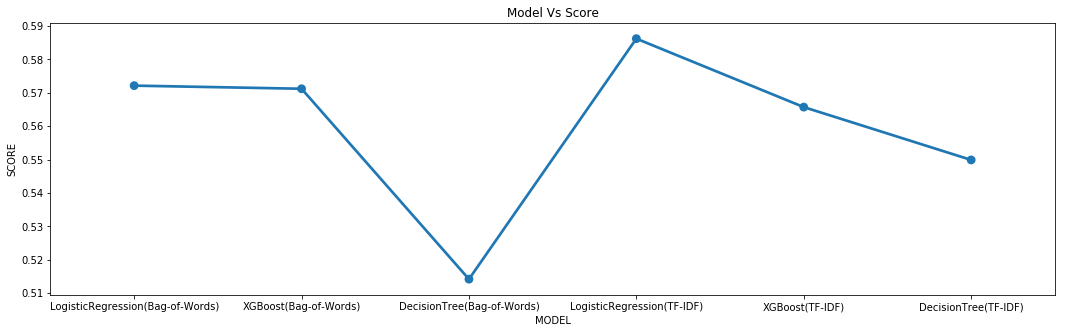

In [ ]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

## Using the best possible model to predict for the test data

#### From the above comaprison graph we can see that Logistic Regression trained using TF-IDF features gives us the best performance

In [ ]:
test_tfidf = tfidf_matrix[31962:]

In [ ]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]

submission.to_csv('result.csv', index=False)

### Test dataset after prediction

In [ ]:
res = pd.read_csv('result.csv')

In [ ]:
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
5,31968,0
6,31969,0
7,31970,0
8,31971,0
9,31972,0


# Summary

- From the given dataset we were able to predict on which class i.e Positive or Negative does the given tweet fall into.The following data was collected from Analytics Vidhya's site.

### Pre-processing 
1. Removing Twitter Handles(@user)
2. Removing puntuation,numbers,special characters
3. Removing short words i.e. words with length<3
4. Tokenization
5. Stemming

### Data Visualisation
1. Wordclouds
2. Barplots

### Word Embeddings used to convert words to features for our Machine Learning Model

1. Bag-of-Words 
2. TF-IDF 

### Machine Learning Models used
1. Logistic Regression
2. XGBoost
3. Decision Trees 

### Evaluation Metrics 
- F1 score

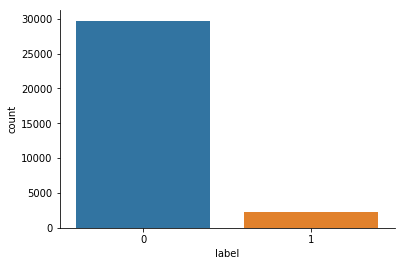

In [ ]:
sns.countplot(train_original['label'])
sns.despine()

### Why use F1-Score instead of Accuracy ?

- From the above countplot generated above we see how imbalanced our dataset is.We can see that the values with label:0 i.e. positive sentiments are quite high in number as compared to the values with labels:1 i.e. negative sentiments.


- So when we keep accuracy as our evaluation metric there may be cases where we may encounter high number of false positives.

#### Precison & Recall :- 
- Precision means the percentage of your results which are relevant.
- Recall refers to the percentage of total relevant results correctly classified by your algorithm
![met](https://cdn-images-1.medium.com/max/800/1*pOtBHai4jFd-ujaNXPilRg.png)

- We always face a trade-off situation between Precison and Recall i.e. High Precison gives low recall and vice versa.




- In most problems, you could either give a higher priority to maximizing precision, or recall, depending upon the problem you are trying to solve. But in general, there is a simpler metric which takes into account both precision and recall, and therefore, you can aim to maximize this number to make your model better. This metric is known as F1-score, which is simply the harmonic mean of precision and recall.

![f1](https://cdn-images-1.medium.com/max/800/1*DIhRgfwTcxnXJuKr2_cRvA.png)


- So this metric seems much more easier and convenient to work with, as you only have to maximize one score, rather than balancing two separate scores.